In [163]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress

Death Rate by State

In [164]:
df1 = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")

In [165]:
df1.rename(columns={"Unnamed: 0": "State", "Covid_Death_Rate":"Cum_Covid_19_Death_Rate"},inplace=True)
df1.drop([0,1,2,3,4,12,36,41,60,62,54,56,61],inplace=True)
df1 = df1.reset_index(drop=True)

In [166]:
states = df1["State"]
death_rate = df1["Cum_Covid_19_Death_Rate"]
df1.iloc[0,0]

'AK'

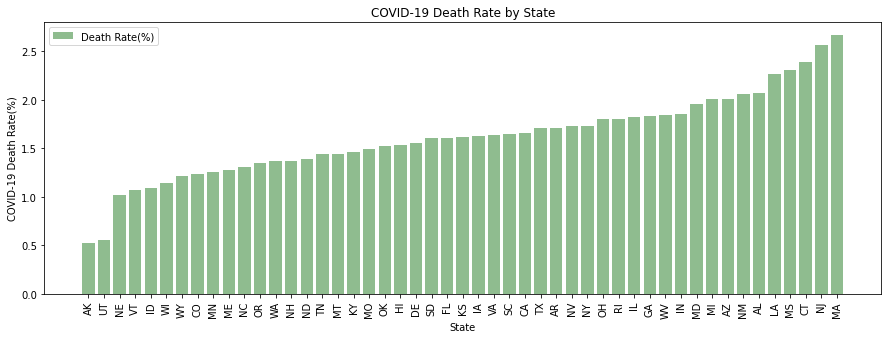

In [204]:
plt.figure(figsize=(15,5))
plt.bar(states,death_rate, color='darkseagreen', label='Death Rate(%)')
#plt.grid(True)
plt.title('COVID-19 Death Rate by State')
plt.ylabel('COVID-19 Death Rate(%)')
plt.xlabel('State')
plt.legend()
plt.xticks(rotation = 90)
plt.savefig("Output/death-rate-by-state.png")
plt.show()

Age Data Analysis

In [168]:
age_data = pd.read_csv("../Folder3/final-age-data.csv")
us_byage_df = age_data.loc[age_data.State=="United States"][["Age Group","Population %"]]
age_data.head()

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group,COVID-19 Death Rate,Population %,COVID-19 Death Rate by Age
0,1/1/20,4/24/21,By Total,United States,Under 5 years,34.0,4286.0,19531315.0,0.000174,5.963145,0.006099
1,1/1/20,4/24/21,By Total,United States,5-14 years,98.0,6930.0,40926765.0,0.000239,12.495434,0.017579
2,1/1/20,4/24/21,By Total,United States,15-24 years,844.0,44906.0,42599542.0,0.001981,13.006152,0.151394
3,1/1/20,4/24/21,By Total,United States,25-34 years,3741.0,92911.0,45775780.0,0.008172,13.975896,0.671048
4,1/1/20,4/24/21,By Total,United States,35-44 years,9724.0,133834.0,41550175.0,0.023403,12.685768,1.744259


In [169]:
age_data = age_data.loc[age_data['Age Group']!='All Ages']

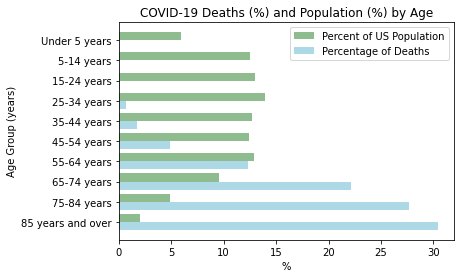

In [170]:
x_axis = []
x_axis = age_data['Age Group'].tolist()
ind = np.arange(len(x_axis))
width = 0.4

death_axis = age_data['COVID-19 Death Rate by Age'].astype(float)
pop_axis = age_data['Population %'].astype(float)
fig, ax = plt.subplots()

ax.barh(ind-width, pop_axis, width, label ='Percent of US Population', color='darkseagreen', align='center')
ax.barh(ind, death_axis, width, color='lightblue', label='Percentage of Deaths', align='center')


ax.set_yticks(ind-.2)
ax.legend()
ax.set_xlabel('%')
ax.set_ylabel('Age Group (years)')
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('COVID-19 Deaths (%) and Population (%) by Age')
plt.savefig('Output/COVID-19 Deaths (%) and Population (%) by Age.png')
plt.show()

Age normalization

In [171]:
age_df = pd.read_csv("../Folder3/age-pop-state.csv")
us_byage_df
us_byage = {}
for index,row in us_byage_df.iterrows():
    us_byage[row[0]]=row[1]
    
us_byage  

{'Under 5 years': 5.963145345737688,
 '5-14 years': 12.495433524360758,
 '15-24 years': 13.006152458646906,
 '25-34 years': 13.97589611628876,
 '35-44 years': 12.685768094254609,
 '45-54 years': 12.4569187176404,
 '55-64 years': 12.938714833115196,
 '65-74 years': 9.596938238192193,
 '75-84 years': 4.868197195444035,
 '85 years and over': 2.012835476319459}

death rate/age group[newcolumm]
import us population
us pop or %
deathrate/age group * us pop %
group by state
sum


In [172]:
age_df["Death_Rate_by_Age"]=""
age_df["US_Population_by_Age"]=""
age_df["Normalized_Death_Rate"]=""
us_byage_df
for index, row in age_df.iterrows():
    age_df.loc[index,"Death_Rate_by_Age"] = float(age_df.loc[index,"COVID-19 Deaths"]/age_df.loc[index,"Population"])
    age_group = row[4]
    age_df.loc[index,"US_Population_by_Age"] = float(us_byage[age_group])
    age_df.loc[index,"Normalized_Death_Rate"] = age_df.loc[index,"US_Population_by_Age"]*age_df.loc[index,"Death_Rate_by_Age"]
    state = row[3]
    age_df.loc[index,"State"] = us_state_abbrev[state]


In [173]:
age_df.head()

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Population,Death_Rate_by_Age,US_Population_by_Age,Normalized_Death_Rate
0,1/1/20,4/24/21,By Total,USA,Under 5 years,34.0,NaN,NaN,5.96315,NaN
1,1/1/20,4/24/21,By Total,USA,5-14 years,98.0,NaN,NaN,12.4954,NaN
2,1/1/20,4/24/21,By Total,USA,15-24 years,844.0,NaN,NaN,13.0062,NaN
3,1/1/20,4/24/21,By Total,USA,25-34 years,3741.0,NaN,NaN,13.9759,NaN
4,1/1/20,4/24/21,By Total,USA,35-44 years,9724.0,NaN,NaN,12.6858,NaN


In [174]:
a = age_df.groupby(by=age_df["State"])["Population"].sum()
b = age_df.groupby(by=age_df["State"])["COVID-19 Deaths"].sum()
c = 100*b/a
d = age_df.groupby(by=age_df["State"])["Normalized_Death_Rate"].sum()
e = d/c

In [175]:
dff.head()

,Actual_DR,Normalized_DR,Delta
State,,,
AK,0.043606,0.063322,1.452128
AL,0.212372,0.207580,0.977434
AR,0.195009,0.189573,0.972121
AZ,0.213197,0.204625,0.959793
CA,0.159406,0.172598,1.082753


In [176]:
dff = pd.DataFrame({"Actual_DR":c,"Normalized_DR":d,"Delta":e})
dff.sort_values(by="Delta",ascending=False)
dfff = dff.merge(df1,on="State")
dfff.head()
    

,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate
0,AK,0.043606,0.063322,1.452128,0.521335
1,AL,0.212372,0.207580,0.977434,2.063941
2,AR,0.195009,0.189573,0.972121,1.707780
3,AZ,0.213197,0.204625,0.959793,2.008587
4,CA,0.159406,0.172598,1.082753,1.662034


In [177]:
%pwd

'/Users/jenniecinelli/Desktop/HomeworkFolder/project_one/Folder4'

In [178]:
dfff["Adj_for_age_Covid_Death_Rate"]=""
for index,row in dfff.iterrows():
    dfff.loc[index,"Adj_for_age_Covid_Death_Rate"]=dfff.loc[index,"Delta"]*dfff.loc[index,"Cum_Covid_19_Death_Rate"]
dfff.to_csv("Output/Adj_for_age_Death_Rate.csv")

In [192]:
dfff = dfff.sort_values(by="Cum_Covid_19_Death_Rate")
adj_death_rate = dfff["Adj_for_age_Covid_Death_Rate"]
death_rate = dfff["Cum_Covid_19_Death_Rate"]
states = dfff["State"]

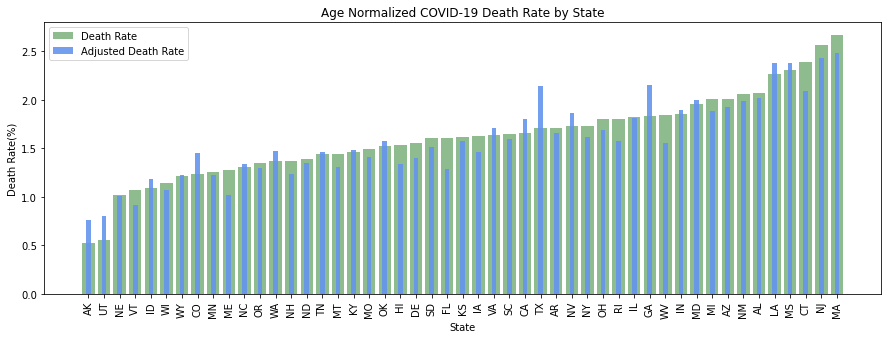

In [196]:
plt.figure(figsize=(15,5))
plt.bar(states,death_rate, label='Death Rate', color='darkseagreen')
plt.bar(states,adj_death_rate, label = 'Adjusted Death Rate', color='cornflowerblue', alpha=.9, width=0.3)
#plt.grid(True, color='lightgrey')
plt.title('Age Normalized COVID-19 Death Rate by State')
plt.ylabel('Death Rate(%)')
plt.xlabel('State')
plt.legend()
plt.xticks(rotation = 90)
#plt.savefig("Output/death-rate-by-state-adjusted.png")
plt.show()

Box plots for death rate/adjusted death rate

In [131]:
dfff = pd.read_csv("Output/Adj_for_age_Death_Rate.csv")
dfff.head()

,Unnamed: 0,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate
0,0,AK,0.043606,0.063322,1.452128,0.521335,0.757045
1,1,AL,0.212372,0.207580,0.977434,2.063941,2.017367
2,2,AR,0.195009,0.189573,0.972121,1.707780,1.660169
3,3,AZ,0.213197,0.204625,0.959793,2.008587,1.927828
4,4,CA,0.159406,0.172598,1.082753,1.662034,1.799573


In [132]:
# Locate the rows which contain mice on Infubinol and get the tumor volumes

death_rate = dfff["Cum_Covid_19_Death_Rate"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
death_quartiles = death_rate.quantile([.25,.5,.75])
death_lowerq = death_quartiles[0.25]
death_upperq = death_quartiles[0.75]
death_iqr = death_upperq-death_lowerq

print(f"The lower quartile of the death rate for all states is: {round(death_lowerq,2)}")
print(f"The upper quartile of the death rate for all states is: {round(death_upperq,2)}")
print(f"The interquartile range of the death rate for all states is: {round(death_iqr,2)}")
print(f"The median of the death rate for all states is: {round(death_quartiles[0.5],2)} ")

# Determine outliers using upper and lower bounds
death_lower_bound = death_lowerq - (1.5*death_iqr)
death_upper_bound = death_upperq + (1.5*death_iqr)
print(f"Values below {round(death_lower_bound,2)} could be outliers.")
print(f"Values above {round(death_upper_bound,2)} could be outliers.")

The lower quartile of the death rate for all states is: 1.36
The upper quartile of the death rate for all states is: 1.84
The interquartile range of the death rate for all states is: 0.47
The median of the death rate for all states is: 1.61 
Values below 0.66 could be outliers.
Values above 2.54 could be outliers.


In [133]:
# Locate the rows which contain mice on Infubinol and get the tumor volumes

adj_rate = dfff["Adj_for_age_Covid_Death_Rate"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
adj_quartiles = adj_rate.quantile([.25,.5,.75])
adj_lowerq = adj_quartiles[0.25]
adj_upperq = adj_quartiles[0.75]
adj_iqr = adj_upperq-adj_lowerq

print(f"The lower quartile of the adjusted death rate for all states is: {round(adj_lowerq,2)}")
print(f"The upper quartile of the adjusted death rate for all states is: {round(adj_upperq,2)}")
print(f"The interquartile range of the adjusted death rate for all states is: {round(adj_iqr,2)}")
print(f"The median of the adjusted death rate for all states is: {round(adj_quartiles[0.5],2)} ")

# Determine outliers using upper and lower bounds
adj_lower_bound = adj_lowerq - (1.5*adj_iqr)
adj_upper_bound = adj_upperq + (1.5*adj_iqr)
print(f"Values below {round(adj_lower_bound,2)} could be outliers.")
print(f"Values above {round(adj_upper_bound,2)} could be outliers.")

The lower quartile of the adjusted death rate for all states is: 1.31
The upper quartile of the adjusted death rate for all states is: 1.89
The interquartile range of the adjusted death rate for all states is: 0.58
The median of the adjusted death rate for all states is: 1.56 
Values below 0.44 could be outliers.
Values above 2.75 could be outliers.


In [134]:
values = [death_rate, adj_rate]
labels = ["Death Rate", "Adjusted Death Rate"]

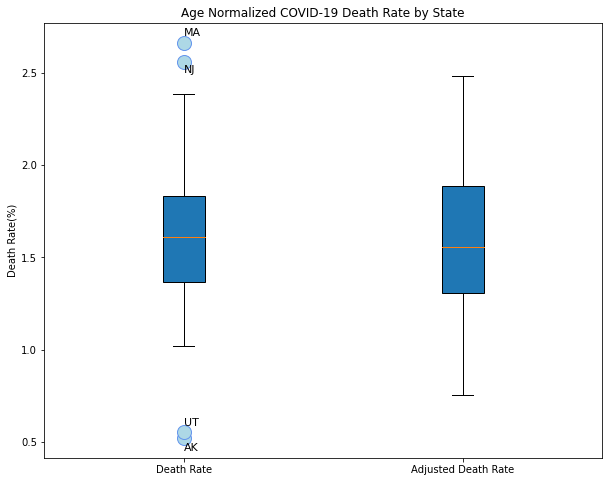

In [197]:
fig, ax1 = plt.subplots(figsize=(10, 8))
flierprops = dict(marker='o', 
                  markersize=14, 
                  markerfacecolor='lightblue',
                  markeredgecolor='cornflowerblue')

plt.boxplot = ax1.boxplot(values, labels=labels, patch_artist=True, flierprops=flierprops)

plt.annotate('MA',
    (1, 2.7),
    xytext=(1, 2.7),
    fontsize=11)
plt.annotate('NJ',
    (1, 2.5),
    xytext=(1, 2.5),
    fontsize=11)
plt.annotate('AK',
    (1, 0.45),
    xytext=(1, 0.45),
    fontsize=11)
plt.annotate('UT',
    (1, 0.59),
    xytext=(1, 0.59),
    fontsize=11)


#for index, row in df1.iterrows():
#        print(f"{row[0]} at coords: ({row[1]})")
#        plt.annotate(row[0],row[1])
plt.title('Age Normalized COVID-19 Death Rate by State')
plt.ylabel('Death Rate(%)')
plt.savefig("Output/death-rate-boxplot.png")
plt.show()


Health Data - Hospital Beds

In [136]:
hospital_df = pd.read_csv("../Folder1/hospitalbeds_percapita_bystate.csv",skiprows=(0,1))

In [137]:
hospital_df.drop([52,53,54,55,56,57,58,59,60,61,62,63,64,65,66],inplace=True)
hospital_df = hospital_df.reset_index(drop=True)

In [138]:
hospital_df.head()

,Location,State/Local Government,Non-Profit,For-Profit,Total
0,United States,0.3,1.7,0.4,2.4
1,Alabama,1.4,0.8,0.9,3.1
2,Alaska,0.3,1.5,0.4,2.2
3,Arizona,0.1,1.4,0.5,1.9
4,Arkansas,0.3,2.1,0.6,3.0


In [139]:
us_state_abbrev = {
    'United States': 'USA',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York City':"NYC",
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [140]:
total_beds = []
total_beds = hospital_df['Total'].tolist()

In [141]:
states = hospital_df["Location"].unique()

In [142]:
Dict = {"States":[],"Total Beds":[]}
for state in states:

    Dict["States"].append(us_state_abbrev[state])
    Dict["Total Beds"].append(total_beds)

In [143]:
hospital_beds = pd.DataFrame(Dict)
hospital_beds['Total Beds'] = total_beds

In [144]:
df_deathrate = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv")
df_deathrate.rename(columns={"Unnamed: 0":"States"},inplace=True)
df_deathrate = df_deathrate.loc[df_deathrate['States']!='RMI']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='FSM']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='AS']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='NYC']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='PW']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='DC']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='PR']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='GU']
df_deathrate = df_deathrate.loc[df_deathrate['States']!='MP']

In [145]:
df_deathrate = df_deathrate.dropna()

In [146]:
df_deathrate = df_deathrate.reset_index(drop=True)

In [147]:
df_merge = df_deathrate.merge(hospital_beds, how='inner', on="States")

In [148]:
state_names = df_merge["States"]
total_beds = df_merge["Total Beds"]
Covid_Death_Rate = df_merge["Covid_Death_Rate"]

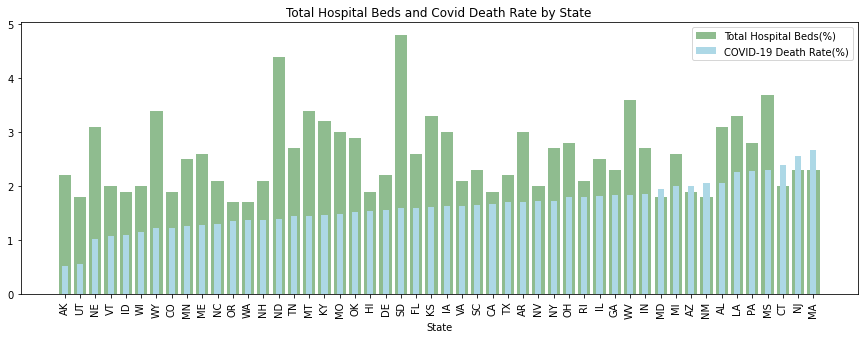

In [198]:
plt.figure(figsize=(15,5))
plt.bar(state_names, total_beds, label='Total Hospital Beds(%)', color='darkseagreen')
plt.bar(state_names, Covid_Death_Rate, label='COVID-19 Death Rate(%)', width=.4, color='lightblue')
#plt.grid(True, color='lightgrey')
plt.title('Total Hospital Beds and Covid Death Rate by State')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.legend()
fig.tight_layout()
plt.show()

In [150]:
renamed_beds = hospital_beds.rename(columns={'States':'State'})

In [154]:
dfff_merged = dfff.merge(renamed_beds, how='inner', on="State")
dfff_merged = dfff_merged.sort_values(by="Adj_for_age_Covid_Death_Rate")

In [155]:
dfff_merged.head()

,Unnamed: 0,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate,Total Beds
0,0,AK,0.043606,0.063322,1.452128,0.521335,0.757045,2.2
42,42,UT,0.073363,0.106704,1.454459,0.554209,0.806074,1.8
44,44,VT,0.034616,0.029556,0.853828,1.071802,0.915134,2.0
28,28,NE,0.145057,0.143926,0.992200,1.020306,1.012348,3.1
20,20,ME,0.064052,0.051090,0.797628,1.274175,1.016317,2.6


In [156]:
states_names = dfff_merged["State"]
totals_beds = dfff_merged["Total Beds"]

In [157]:
adj_death_rates = dfff_merged["Adj_for_age_Covid_Death_Rate"]


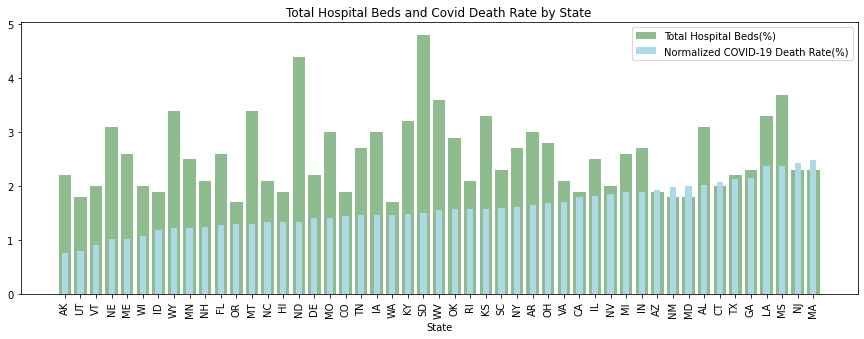

In [200]:
plt.figure(figsize=(15,5))
plt.bar(states_names, totals_beds, label='Total Hospital Beds(%)', color='darkseagreen')
plt.bar(states_names, adj_death_rates, label='Normalized COVID-19 Death Rate(%)', width=.4, color='lightblue')
#plt.grid(True, color='lightgrey')
plt.title('Total Hospital Beds and Covid Death Rate by State')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.legend()
fig.tight_layout()
plt.savefig("Output/death-rate-and-beds-by-state.png")
plt.show()

In [159]:
df_merge.head()

,States,Covid_Death_Rate,Total Beds
0,AK,0.521335,2.2
1,UT,0.554209,1.8
2,NE,1.020306,3.1
3,VT,1.071802,2.0
4,ID,1.090293,1.9


In [160]:
dfff_merged.head()

,Unnamed: 0,State,Actual_DR,Normalized_DR,Delta,Cum_Covid_19_Death_Rate,Adj_for_age_Covid_Death_Rate,Total Beds
0,0,AK,0.043606,0.063322,1.452128,0.521335,0.757045,2.2
42,42,UT,0.073363,0.106704,1.454459,0.554209,0.806074,1.8
44,44,VT,0.034616,0.029556,0.853828,1.071802,0.915134,2.0
28,28,NE,0.145057,0.143926,0.992200,1.020306,1.012348,3.1
20,20,ME,0.064052,0.051090,0.797628,1.274175,1.016317,2.6


The r-squared is 0.0
The line equation is: y = 0.03x + 1.52


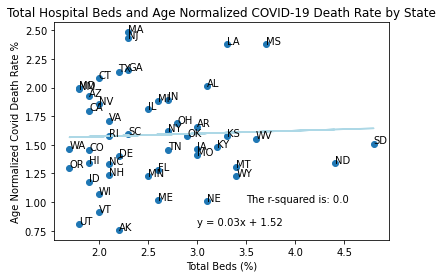

In [202]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(totals_beds, adj_death_rates)

regress_values = totals_beds * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(totals_beds, adj_death_rates)

plt.plot(totals_beds,regress_values,"lightblue")

r_sqr = round(rvalue**2,2)

plt.annotate(line_eq,(3, .8),fontsize=10,color="black")

plt.annotate(f"The r-squared is: {r_sqr}",(3.5,1),fontsize=10,color="black")

plt.xlabel('Total Beds (%)')
plt.ylabel('Age Normalized Covid Death Rate %')
plt.title("Total Hospital Beds and Age Normalized COVID-19 Death Rate by State")

print(f"The r-squared is {r_sqr}")
print(f"The line equation is: {line_eq}")

for index, row in dfff_merged.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[1],(row[7],row[6]))

plt.savefig("Output/total-beds-and-deaths-regression.png")
plt.show()
